# Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import csv
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import LabelEncoder

# Importing, Splitting and Normalisng Dataset

In [5]:
modelEncoder = LabelEncoder()
transmissionEncoder = LabelEncoder()
fuelTypeEncoder = LabelEncoder()
scaler = MinMaxScaler()

def dataset(brand):
    file = pd.read_csv(brand, quotechar='"', skipinitialspace=True)

    modelEncoder.fit(file["model"])
    file["model"] = modelEncoder.transform(file["model"])
    
    transmissionEncoder.fit(file["transmission"])
    file["transmission"] = transmissionEncoder.transform(file["transmission"])
    
    fuelTypeEncoder.fit(file["fuelType"])
    file["fuelType"] = fuelTypeEncoder.transform(file["fuelType"])

    file = file.head(1000) # Limits dataset size

    X = file.drop(columns = ['price'])
    Y = file.price

#     print(file)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 601)
    
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    print(list(fuelTypeEncoder.classes_))

    return  X_train, X_test, Y_train, Y_test

In [6]:
X_train, X_test, Y_train, Y_test = dataset("UKUsedCarDataSet/audi.csv") # Use Audi dataset as default for KNN analysis

['Diesel', 'Hybrid', 'Petrol']


# KNN using Scikit-Learn

In [4]:
from sklearn.neighbors import KNeighborsRegressor as KNN_Reg
knn = KNN_Reg(n_neighbors = 4)
knn.fit(X_train, Y_train)
print(knn.score(X_test, Y_test))

0.8905304474015207


Text(0, 0.5, 'R^2')

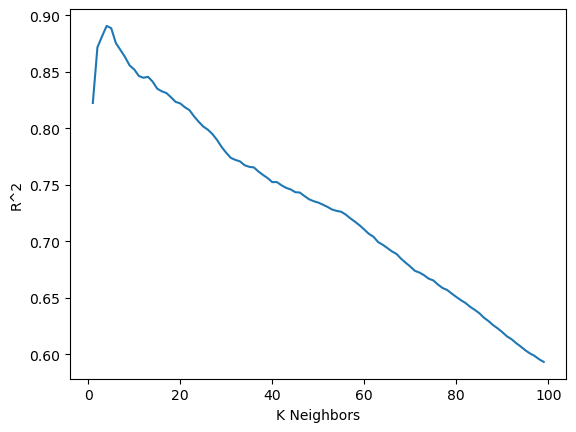

In [5]:
results = np.empty(99)
for k in range(1, 100):
    knn = KNN_Reg(n_neighbors = k)
    knn.fit(X_train, Y_train)
    results[k - 1] = (knn.score(X_test, Y_test))

plt.plot(np.arange(99) + 1, results)
plt.xlabel('K Neighbors')
plt.ylabel('R^2')

# Euclidean Distance

In [6]:
def eucDistance(variable1, variable2):
    distance = 0
    for i in range(len(variable2)):
        distance += (variable1[i] - variable2[i])**2
    return np.sqrt(distance)

# KNN

In [7]:
def kNN(train, testRow, yTrain, num):
    distance = list() #Stores distance of each point
    for i in range(len(train)): #REMOVED -1 from here!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        dist = eucDistance(train[i], testRow) #sends points to work out distance
        distance.append((train[i], dist, yTrain.iloc[i])) #CHNAGEEE
    distance = sort(distance) #need to create a sort method to order list
#     print("DISTANCE: ", distance)
    kNeighbours = list() #list to store K amount of neighbour results
    for i in range(num):
        kNeighbours.append((testRow, distance[i][1], distance[i][2]))
    return kNeighbours 

# Sort Method

In [8]:
def sort(dist):
    for i in range(0, len(dist)):
        for j in range(0, len(dist) - i - 1):
            if (dist[j][1] > dist[j + 1][1]):
                temp = dist[j]
                dist[j] = dist[j + 1]
                dist[j + 1] = temp
    return dist

# Predict Method

In [9]:
from statistics import mean 

def predict(train, test, yTrain, num_neighbors):
    predictions = list()
    for i in range(len(test)):
        neighbour = kNN(train, test[i], yTrain, num_neighbors) #CHANGE
        labels = [] #Stores yTrain for each test variable
        for i in range (len(neighbour)):
            t = labels.append(neighbour[i][2]) #Appends yTrain
        predictions.append(mean(labels))
    return predictions

# RMSE

In [10]:
def rmse(test, pred):
    MSE = np.square(np.subtract(test, pred)).mean()
    return sqrt(MSE)

# Evaluation Method

In [11]:
def eva(train, test, yTrain, yTest):
    rmseValues = []
    predictions = []
    for k in range(1, 101): #Testing up to 100 neearest neighbours
        y_pred = predict(train, test, yTrain, k)
        error = rmse(yTest, y_pred) 
        rmseValues.append(error)
        print('RMSE value for k =' , k , 'is:', error)

    plt.plot(np.arange(100) + 1, rmseValues)
    plt.xlabel('K Neighbors')
    plt.ylabel('RMSE')
    
    return

In [12]:
eva(X_train, X_test, Y_train, Y_test)

KeyboardInterrupt: 

# 1NN

In [ ]:
def NN(train, test, yTrain, yTest):    
    y_pred = predict(train, test, yTrain, 4)
    error = rmse(yTest, y_pred) 
    print('RMSE value for k =' , 4 , 'is:', error)
    for i in range(len(y_pred)):
        print("\nOriginal value:", yTest.iloc[i], "vs the predicted value:", y_pred[i])
        print("The difference is:", yTest.iloc[i] - y_pred[i])
    
    ### Below is attempt to put data on bar chart
#     YTest = pd.DataFrame(yTest)
# #     y_pred = pd.DataFrame(y_pred)
# #     y_pred = pd.DataFrame({'Price_prediction': y_pred.flatten()})
# #     Comparison = yTest.join(y_pred)
#     plt.bar(yTest, y_pred)
# #     plt.grid(linestyle = '-', linewidth = '0.6', color = 'green', which = 'both')
#     plt.show()
    return 
NN(X_train, X_test, Y_train, Y_test)

# User Input Predictions

In [13]:
inputPred = []
entries = []

def userInput():
    chooseBrand = input("Choose your car brand: Audi, BMW, Ford, Hyundi, Mercedes, Skoda, Toyota, Vauxhall or Volkswagen \n")
    
    if chooseBrand == "Audi":
        return "UKUsedCarDataSet/audi.csv"
    elif chooseBrand == "BMW":
        return "UKUsedCarDataSet/bmw.csv"
    elif chooseBrand == "Ford":
        return "UKUsedCarDataSet/ford.csv"
    elif chooseBrand == "Hyundi":
        return "UKUsedCarDataSet/hyundi.csv"
    elif chooseBrand == "Mercedes":
        return "UKUsedCarDataSet/merc.csv"
    elif chooseBrand == "Skoda":
        return "UKUsedCarDataSet/skoda.csv"
    elif chooseBrand == "Toyota":
        return "UKUsedCarDataSet/toyota.csv"
    elif chooseBrand == "Vauxhall":
        return "UKUsedCarDataSet/vauxhall.csv"
    elif chooseBrand == "Volkswagen":
        return "UKUsedCarDataSet/vw.csv"
    else:
        print("Invalid Car Brand")
        userInput()
    return 
  
X_train, X_test, Y_train, Y_test = dataset(userInput())

print("\n List of models:")
print(list(modelEncoder.classes_))

inputPred.append((modelEncoder.transform([input("\nWhat Model is your car? ")]))[0])
inputPred.append(int(input("What year is your car? ")))
inputPred.append((transmissionEncoder.transform([input("What transmission is your car? ")]))[0])
inputPred.append(int(input("How much mileage does your car have? ")))
inputPred.append((fuelTypeEncoder.transform([input("What's your car fuel type? ")]))[0])
inputPred.append(int(input("How much is your cars tax? ")))
inputPred.append(float(input("What's MPG of your car? ")))
inputPred.append(float(input("What the engine size of your car? ")))
entries.append(inputPred)
inputPred = scaler.transform([inputPred])

import time
print("\n ***Predicting***")
start = time.time()
y_pred = predict(X_train, inputPred, Y_train, 4)
# {0:.2f}'.format()
print("\n Predicted price for your car is: £", y_pred[0])

print("\n ***Predicted in", time.time() - start,"seconds***")

# Audi,RS6,2016,Semi-Auto,49050,Petrol,325,29.4,4.0    Price = £44,985 Pred:44,717
# BMW,5 Series,2019,Semi-Auto,4405,Petrol,145,48.7,2.0     Price = £26,000
# Skoda,Octavia,2019,Manual,14449,Petrol,150,55.4,1.5      Price = £13,490 Pred: £14,170

Choose your car brand: Audi, BMW, Ford, Hyundi, Mercedes, Skoda, Toyota, Vauxhall or Volkswagen 
Audi

 List of models:
['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'Q2', 'Q3', 'Q5', 'Q7', 'Q8', 'R8', 'RS3', 'RS4', 'RS5', 'RS6', 'RS7', 'S3', 'S4', 'S5', 'S8', 'SQ5', 'SQ7', 'TT']

What Model is your car? RS6
What year is your car? 2016
What transmission is your car? Semi-Auto
How much mileage does your car have? 49050
What's your car fuel type? Petrol
How much is your cars tax? 325
What's MPG of your car? 29.4
What the engine size of your car? 4

 ***Predicting***

 Predicted price for your car is: £ 44717

 ***Predicted in 0.19118833541870117 seconds***


C:\Users\rb22\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [1]:
testy = 44985
pred = 44717
print(rmse(testy, pred))

NameError: name 'rmse' is not defined

# Scikit-Learn User Input Predictions

In [ ]:
knn.predict(inputPred)

# Interface

In [1]:
# import gradio as gr

# def greet(name):
#     return "Hello " + name + "!"

# demo = gr.Interface(fn=greet, inputs="text", outputs="text")

# demo.launch() 